In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import hashlib
from sklearn.linear_model import LinearRegression
import subprocess
import sys

In [393]:
MAIN = Path(".")
RAW = MAIN / "data" / "raw"
CLEANED = MAIN / "data" / "cleaned"
SUMMARY_STATS = MAIN / "summary_stats"
VISUALS = MAIN / "visuals"

for i in [RAW, CLEANED, SUMMARY_STATS, VISUALS]:
    i.mkdir(parents=True, exist_ok=True)

In [394]:
def sha256sum(path: Path) -> str:
    hash = hashlib.sha256()
    with path.open("rb") as f:
        data = f.read()
        hash.update(data)
    return hash.hexdigest()

fed_path = RAW / "Federal_Funds_Rate.csv"
sp500_path = RAW / "S&P_500_Data.csv"

In [395]:
x = {
    "Federal_Funds_Rate.csv": sha256sum(fed_path),
    "S&P_500_Data.csv": sha256sum(sp500_path),
}

for f, sha256 in x.items():
    print(f, "SHA-256:", sha256)

sha = pd.Series(x, name="sha256")
sha.to_csv(SUMMARY_STATS / "sha-256.txt", header=True)

Federal_Funds_Rate.csv SHA-256: ce05a5c26bfac61145b280f032ac6f364a12386001908f8133eeddd1ff0aab48
S&P_500_Data.csv SHA-256: a60a77aa75b22a633b9d90b20d12c1d658375db36c0dfc1ddaab5c71050e61e8


In [396]:
stock_df = pd.read_csv(RAW / "S&P_500_Data.csv")
ffr_df = pd.read_csv(RAW / "Federal_Funds_Rate.csv")

stock_df["Date"] = pd.to_datetime(stock_df["Date"])
ffr_df["Date"] = pd.to_datetime(ffr_df["Date"])

print("S&P 500:")
stock_df

S&P 500:


Date     Price      Open      High       Low  Vol. Change %
0    2025-11-12  6,847.98  6,868.51  6,869.83  6,827.76   NaN    0.02%
1    2025-11-11  6,846.61  6,815.64  6,855.13  6,806.87   NaN    0.21%
2    2025-11-10  6,832.43  6,785.36  6,841.32  6,770.56   NaN    1.54%
3    2025-11-07  6,728.80  6,696.18  6,730.11  6,631.44   NaN    0.13%
4    2025-11-06  6,720.32  6,787.59  6,796.68  6,707.51   NaN   -1.12%
...         ...       ...       ...       ...       ...   ...      ...
2006 2017-11-17  2,578.80  2,582.90  2,584.00  2,577.60   NaN   -0.26%
2007 2017-11-16  2,585.60  2,572.90  2,590.10  2,572.90   NaN    0.82%
2008 2017-11-15  2,564.60  2,569.40  2,572.80  2,557.40   NaN   -0.55%
2009 2017-11-14  2,578.90  2,577.80  2,579.70  2,566.60   NaN   -0.23%
2010 2017-11-13  2,584.80  2,576.50  2,587.70  2,574.50   NaN    0.10%

[2011 rows x 7 columns]

In [397]:
print("S&P 500 Data Info:")
stock_df.info()

S&P 500 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2011 non-null   datetime64[ns]
 1   Price     2011 non-null   object        
 2   Open      2011 non-null   object        
 3   High      2011 non-null   object        
 4   Low       2011 non-null   object        
 5   Vol.      0 non-null      float64       
 6   Change %  2011 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 110.1+ KB


In [398]:
print("Missing Values in S&P 500 Data:")
stock_df.isna().sum()

Missing Values in S&P 500 Data:


Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2011
Change %       0
dtype: int64

In [399]:
print("Federal Funds:")
ffr_df

Federal Funds:


Date  M2_Money_Supply  10Y Treasury Yield  Fed Funds Rate      CPI  \
0    2018-04-03          13993.9                2.87            1.69  250.227   
1    2018-04-04          13993.9                2.87            1.69  250.227   
2    2018-04-05          13993.9                2.87            1.69  250.227   
3    2018-04-06          13993.9                2.87            1.69  250.227   
4    2018-04-09          13993.9                2.87            1.69  250.227   
...         ...              ...                 ...             ...      ...   
1885 2025-06-24          21942.0                4.42            4.33  320.580   
1886 2025-06-25          21942.0                4.42            4.33  320.580   
1887 2025-06-26          21942.0                4.42            4.33  320.580   
1888 2025-06-27          21942.0                4.42            4.33  320.580   
1889 2025-06-28          21942.0                4.42            4.33  320.580   

      Inflation_Rate_%  SOFR  
0             2.470996  1.83  
1             2.470996  1.74  
2             2.470996  1.75  
3             2.470996  1.75  
4             2.470996  1.75  
...                ...   ...  
1885          2.375934  4.30  
1886          2.375934  4.36  
1887          2.375934  4.40  
1888          2.375934  4.40  
1889          2.375934  4.40  

[1890 rows x 7 columns]

In [400]:
print("Federal Funds Data Info:")
ffr_df.info()

Federal Funds Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1890 non-null   datetime64[ns]
 1   M2_Money_Supply     1890 non-null   float64       
 2   10Y Treasury Yield  1890 non-null   float64       
 3   Fed Funds Rate      1890 non-null   float64       
 4   CPI                 1890 non-null   float64       
 5   Inflation_Rate_%    1890 non-null   float64       
 6   SOFR                1809 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 103.5 KB


In [401]:
print("Missing Values in Federal Funds Data:")
ffr_df.isna().sum()

Missing Values in Federal Funds Data:


Date                   0
M2_Money_Supply        0
10Y Treasury Yield     0
Fed Funds Rate         0
CPI                    0
Inflation_Rate_%       0
SOFR                  81
dtype: int64

In [402]:
stock_clean = stock_df.drop(columns=["Vol."], errors="ignore")

price_cols = ["Price", "Open", "High", "Low"]
for col in price_cols:
    stock_clean[col] = (stock_clean[col].astype(str).str.replace(",", "", regex=False).astype(float))

stock_clean["Date"] = pd.to_datetime(stock_clean["Date"])
filtered_df = stock_clean[(stock_df['Date'] >= '2018-04-03') & (stock_df['Date'] <= '2025-06-28')]
stock_clean = filtered_df


stock_clean = stock_clean.dropna().reset_index(drop=True)

print("S&P 500 Cleaned DF:")
stock_clean

S&P 500 Cleaned DF:


Date    Price     Open     High      Low Change %
0    2025-06-27  6173.07  6150.70  6187.68  6132.35    0.52%
1    2025-06-26  6141.02  6112.09  6146.52  6107.27    0.80%
2    2025-06-25  6092.16  6104.23  6108.51  6080.09    0.00%
3    2025-06-24  6092.18  6061.21  6101.76  6059.25    1.11%
4    2025-06-23  6025.17  5969.67  6028.77  5943.23    0.96%
...         ...      ...      ...      ...      ...      ...
1815 2018-04-09  2613.20  2617.20  2653.60  2610.80    0.33%
1816 2018-04-06  2604.50  2645.80  2656.90  2586.30   -2.19%
1817 2018-04-05  2662.80  2657.40  2672.10  2649.60    0.68%
1818 2018-04-04  2644.70  2584.00  2649.90  2573.60    1.16%
1819 2018-04-03  2614.40  2592.20  2619.10  2575.50    1.26%

[1820 rows x 6 columns]

In [403]:
stock_clean.to_csv(CLEANED / "stock_df_cleaned.csv", index=False)

In [404]:
ffr_df["Date"] = pd.to_datetime(ffr_df['Date'])
fed_clean = ffr_df[(ffr_df['Date'] >= '2018-04-03') & (ffr_df['Date'] <= '2025-06-28')]

num_col = ["M2_Money_Supply", "10Y Treasury Yield", "Fed Funds Rate", "CPI", "Inflation_Rate_%", "SOFR"]
for col in num_col:
    fed_clean[col] = (fed_clean[col].astype(str).str.replace(",", "", regex=False).str.replace("%", "", regex=False))
    fed_clean[col] = pd.to_numeric(fed_clean[col], errors="coerce")

fed_clean = fed_clean.dropna().reset_index(drop=True)

print("Cleaned Federal Funds Data:")
fed_clean

Cleaned Federal Funds Data:


Date  M2_Money_Supply  10Y Treasury Yield  Fed Funds Rate      CPI  \
0    2018-04-03          13993.9                2.87            1.69  250.227   
1    2018-04-04          13993.9                2.87            1.69  250.227   
2    2018-04-05          13993.9                2.87            1.69  250.227   
3    2018-04-06          13993.9                2.87            1.69  250.227   
4    2018-04-09          13993.9                2.87            1.69  250.227   
...         ...              ...                 ...             ...      ...   
1804 2025-06-24          21942.0                4.42            4.33  320.580   
1805 2025-06-25          21942.0                4.42            4.33  320.580   
1806 2025-06-26          21942.0                4.42            4.33  320.580   
1807 2025-06-27          21942.0                4.42            4.33  320.580   
1808 2025-06-28          21942.0                4.42            4.33  320.580   

      Inflation_Rate_%  SOFR  
0             2.470996  1.83  
1             2.470996  1.74  
2             2.470996  1.75  
3             2.470996  1.75  
4             2.470996  1.75  
...                ...   ...  
1804          2.375934  4.30  
1805          2.375934  4.36  
1806          2.375934  4.40  
1807          2.375934  4.40  
1808          2.375934  4.40  

[1809 rows x 7 columns]

In [405]:
fed_clean.to_csv(CLEANED / "ffr_df_cleaned.csv", index=False)

In [406]:
merged_df = pd.merge(stock_clean, fed_clean, on="Date", how="inner")
merged_df = merged_df.sort_values("Date").reset_index(drop=True)
merged_df = merged_df.dropna().reset_index(drop=True)

print("Merged Dataset:")
merged_df


Merged Dataset:


Date    Price     Open     High      Low Change %  M2_Money_Supply  \
0    2018-04-03  2614.40  2592.20  2619.10  2575.50    1.26%          13993.9   
1    2018-04-04  2644.70  2584.00  2649.90  2573.60    1.16%          13993.9   
2    2018-04-05  2662.80  2657.40  2672.10  2649.60    0.68%          13993.9   
3    2018-04-06  2604.50  2645.80  2656.90  2586.30   -2.19%          13993.9   
4    2018-04-09  2613.20  2617.20  2653.60  2610.80    0.33%          13993.9   
...         ...      ...      ...      ...      ...      ...              ...   
1802 2025-06-23  6025.17  5969.67  6028.77  5943.23    0.96%          21942.0   
1803 2025-06-24  6092.18  6061.21  6101.76  6059.25    1.11%          21942.0   
1804 2025-06-25  6092.16  6104.23  6108.51  6080.09    0.00%          21942.0   
1805 2025-06-26  6141.02  6112.09  6146.52  6107.27    0.80%          21942.0   
1806 2025-06-27  6173.07  6150.70  6187.68  6132.35    0.52%          21942.0   

      10Y Treasury Yield  Fed Funds Rate      CPI  Inflation_Rate_%  SOFR  
0                   2.87            1.69  250.227          2.470996  1.83  
1                   2.87            1.69  250.227          2.470996  1.74  
2                   2.87            1.69  250.227          2.470996  1.75  
3                   2.87            1.69  250.227          2.470996  1.75  
4                   2.87            1.69  250.227          2.470996  1.75  
...                  ...             ...      ...               ...   ...  
1802                4.42            4.33  320.580          2.375934  4.29  
1803                4.42            4.33  320.580          2.375934  4.30  
1804                4.42            4.33  320.580          2.375934  4.36  
1805                4.42            4.33  320.580          2.375934  4.40  
1806                4.42            4.33  320.580          2.375934  4.40  

[1807 rows x 12 columns]

In [407]:
print("Shape:")
merged_df.shape

Shape:


(1807, 12)

In [408]:
num_cols = ['Price', 'Open', 'High', 'Low', 'M2_Money_Supply', '10Y Treasury Yield', 'Fed Funds Rate', 'CPI', 'Inflation_Rate_%', 'SOFR']

for col in num_cols:
    merged_df[col] = (merged_df[col].astype(str).str.replace(',', '', regex=False).str.replace('%', '', regex=False))
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

merged_df.to_csv(CLEANED / "merged_df.csv", index=False)


In [409]:
merged_df['Log_Return'] = np.log(merged_df['Price'] / merged_df['Price'].shift(1))
merged_df['Volatility_30D'] = merged_df['Log_Return'].rolling(window = 30).std()
merged_df['FedFunds_Change'] = merged_df['Fed Funds Rate'].diff()
merged_df['SOFR_Change'] = merged_df['SOFR'].diff()
merged_df['Intraday_Range'] = merged_df['High'] - merged_df['Low']

merged_df = merged_df.dropna().reset_index(drop=True)
merged_df

Date    Price     Open     High      Low Change %  M2_Money_Supply  \
0    2018-05-15  2711.40  2718.60  2718.60  2701.90   -0.68%          14049.6   
1    2018-05-16  2722.50  2712.60  2727.80  2712.20    0.41%          14049.6   
2    2018-05-17  2720.10  2719.70  2732.00  2711.40   -0.09%          14049.6   
3    2018-05-18  2713.00  2717.30  2719.50  2709.20   -0.26%          14049.6   
4    2018-05-21  2733.00  2725.90  2739.20  2725.70    0.74%          14049.6   
...         ...      ...      ...      ...      ...      ...              ...   
1772 2025-06-23  6025.17  5969.67  6028.77  5943.23    0.96%          21942.0   
1773 2025-06-24  6092.18  6061.21  6101.76  6059.25    1.11%          21942.0   
1774 2025-06-25  6092.16  6104.23  6108.51  6080.09    0.00%          21942.0   
1775 2025-06-26  6141.02  6112.09  6146.52  6107.27    0.80%          21942.0   
1776 2025-06-27  6173.07  6150.70  6187.68  6132.35    0.52%          21942.0   

      10Y Treasury Yield  Fed Funds Rate      CPI  Inflation_Rate_%  SOFR  \
0                   2.98            1.70  250.792          2.781922  1.79   
1                   2.98            1.70  250.792          2.781922  1.75   
2                   2.98            1.70  250.792          2.781922  1.74   
3                   2.98            1.70  250.792          2.781922  1.73   
4                   2.98            1.70  250.792          2.781922  1.69   
...                  ...             ...      ...               ...   ...   
1772                4.42            4.33  320.580          2.375934  4.29   
1773                4.42            4.33  320.580          2.375934  4.30   
1774                4.42            4.33  320.580          2.375934  4.36   
1775                4.42            4.33  320.580          2.375934  4.40   
1776                4.42            4.33  320.580          2.375934  4.40   

      Log_Return  Volatility_30D  FedFunds_Change  SOFR_Change  Intraday_Range  
0      -0.006873        0.008575              0.0         0.04           16.70  
1       0.004085        0.008372              0.0        -0.04           15.60  
2      -0.000882        0.008304              0.0        -0.01           20.60  
3      -0.002614        0.007134              0.0        -0.01           10.30  
4       0.007345        0.007209              0.0        -0.04           13.50  
...          ...             ...              ...          ...             ...  
1772    0.009561        0.009136              0.0         0.00           85.54  
1773    0.011060        0.009265              0.0         0.01           42.51  
1774   -0.000003        0.007395              0.0         0.06           28.42  
1775    0.007988        0.007417              0.0         0.04           39.25  
1776    0.005205        0.007449              0.0         0.00           55.33  

[1777 rows x 17 columns]

In [410]:
col = ['FedFunds_Change', 'SOFR_Change']

for i in col:
    merged_df[i] = (merged_df[i] * 100).round(2).astype(str) + '%'
    
merged_df = merged_df.dropna().reset_index(drop = True)
merged_df

Date    Price     Open     High      Low Change %  M2_Money_Supply  \
0    2018-05-15  2711.40  2718.60  2718.60  2701.90   -0.68%          14049.6   
1    2018-05-16  2722.50  2712.60  2727.80  2712.20    0.41%          14049.6   
2    2018-05-17  2720.10  2719.70  2732.00  2711.40   -0.09%          14049.6   
3    2018-05-18  2713.00  2717.30  2719.50  2709.20   -0.26%          14049.6   
4    2018-05-21  2733.00  2725.90  2739.20  2725.70    0.74%          14049.6   
...         ...      ...      ...      ...      ...      ...              ...   
1772 2025-06-23  6025.17  5969.67  6028.77  5943.23    0.96%          21942.0   
1773 2025-06-24  6092.18  6061.21  6101.76  6059.25    1.11%          21942.0   
1774 2025-06-25  6092.16  6104.23  6108.51  6080.09    0.00%          21942.0   
1775 2025-06-26  6141.02  6112.09  6146.52  6107.27    0.80%          21942.0   
1776 2025-06-27  6173.07  6150.70  6187.68  6132.35    0.52%          21942.0   

      10Y Treasury Yield  Fed Funds Rate      CPI  Inflation_Rate_%  SOFR  \
0                   2.98            1.70  250.792          2.781922  1.79   
1                   2.98            1.70  250.792          2.781922  1.75   
2                   2.98            1.70  250.792          2.781922  1.74   
3                   2.98            1.70  250.792          2.781922  1.73   
4                   2.98            1.70  250.792          2.781922  1.69   
...                  ...             ...      ...               ...   ...   
1772                4.42            4.33  320.580          2.375934  4.29   
1773                4.42            4.33  320.580          2.375934  4.30   
1774                4.42            4.33  320.580          2.375934  4.36   
1775                4.42            4.33  320.580          2.375934  4.40   
1776                4.42            4.33  320.580          2.375934  4.40   

      Log_Return  Volatility_30D FedFunds_Change SOFR_Change  Intraday_Range  
0      -0.006873        0.008575            0.0%        4.0%           16.70  
1       0.004085        0.008372            0.0%       -4.0%           15.60  
2      -0.000882        0.008304            0.0%       -1.0%           20.60  
3      -0.002614        0.007134            0.0%       -1.0%           10.30  
4       0.007345        0.007209            0.0%       -4.0%           13.50  
...          ...             ...             ...         ...             ...  
1772    0.009561        0.009136            0.0%        0.0%           85.54  
1773    0.011060        0.009265            0.0%        1.0%           42.51  
1774   -0.000003        0.007395            0.0%        6.0%           28.42  
1775    0.007988        0.007417            0.0%        4.0%           39.25  
1776    0.005205        0.007449            0.0%        0.0%           55.33  

[1777 rows x 17 columns]

In [411]:
merged_df.to_csv(CLEANED / "merged_full.csv", index=False)

In [412]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1777 non-null   datetime64[ns]
 1   Price               1777 non-null   float64       
 2   Open                1777 non-null   float64       
 3   High                1777 non-null   float64       
 4   Low                 1777 non-null   float64       
 5   Change %            1777 non-null   object        
 6   M2_Money_Supply     1777 non-null   float64       
 7   10Y Treasury Yield  1777 non-null   float64       
 8   Fed Funds Rate      1777 non-null   float64       
 9   CPI                 1777 non-null   float64       
 10  Inflation_Rate_%    1777 non-null   float64       
 11  SOFR                1777 non-null   float64       
 12  Log_Return          1777 non-null   float64       
 13  Volatility_30D      1777 non-null   float64     

In [413]:
print("Shape:")
merged_df.shape


Shape:


(1777, 17)

In [414]:
merged_df.isna().sum()

Date                  0
Price                 0
Open                  0
High                  0
Low                   0
Change %              0
M2_Money_Supply       0
10Y Treasury Yield    0
Fed Funds Rate        0
CPI                   0
Inflation_Rate_%      0
SOFR                  0
Log_Return            0
Volatility_30D        0
FedFunds_Change       0
SOFR_Change           0
Intraday_Range        0
dtype: int64

In [415]:
merged_describe = merged_df.describe()
merged_describe.to_csv(SUMMARY_STATS / "merged_describe.csv")

print("Merged DF Describe:")
merged_describe

Merged DF Describe:


Price         Open         High          Low  M2_Money_Supply  \
count  1777.000000  1777.000000  1777.000000  1777.000000      1777.000000   
mean   4042.808739  4041.977569  4065.316258  4017.080906     19118.974395   
std     995.320638   994.915941   998.673069   991.156685      2809.134212   
min    2237.400000  2290.700000  2300.700000  2191.900000     14049.600000   
25%    3090.200000  3084.200000  3098.100000  3070.300000     15467.000000   
50%    4048.420000  4046.740000  4076.810000  4015.550000     20730.000000   
75%    4577.100000  4578.830000  4599.390000  4554.710000     21317.400000   
max    6173.070000  6150.700000  6187.680000  6132.350000     21942.000000   

       10Y Treasury Yield  Fed Funds Rate          CPI  Inflation_Rate_%  \
count         1777.000000     1777.000000  1777.000000       1777.000000   
mean             2.753793        2.504440   282.550328          3.604954   
std              1.275578        2.017052    24.680802          2.275584   
min              0.620000        0.050000   250.792000          0.198201   
25%              1.620000        0.100000   257.879000          2.000583   
50%              2.890000        2.270000   280.806000          2.854125   
75%              3.980000        4.570000   307.374000          4.946947   
max              4.800000        5.330000   320.580000          8.999298   

              SOFR   Log_Return  Volatility_30D  Intraday_Range  
count  1777.000000  1777.000000     1777.000000     1777.000000  
mean      2.495076     0.000459        0.010755       48.235352  
std       2.027623     0.012765        0.006970       35.275762  
min       0.010000    -0.127657        0.003524        5.500000  
25%       0.090000    -0.004601        0.006790       25.500000  
50%       2.270000     0.000881        0.008705       39.950000  
75%       4.550000     0.006701        0.012614       61.300000  
max       5.400000     0.090895        0.054091      532.910000

In [416]:
merged_corr = merged_df.corr(numeric_only=True)
merged_corr.to_csv(SUMMARY_STATS / "merged_correlation.csv")

print("Merged DF Correlation:")
merged_corr

Merged DF Correlation:


Price      Open      High       Low  M2_Money_Supply  \
Price               1.000000  0.999266  0.999620  0.999629         0.822986   
Open                0.999266  1.000000  0.999677  0.999600         0.822968   
High                0.999620  0.999677  1.000000  0.999400         0.825861   
Low                 0.999629  0.999600  0.999400  1.000000         0.820112   
M2_Money_Supply     0.822986  0.822968  0.825861  0.820112         1.000000   
10Y Treasury Yield  0.595493  0.595411  0.595434  0.595938         0.386996   
Fed Funds Rate      0.519765  0.519425  0.518349  0.521319         0.287618   
CPI                 0.888795  0.888707  0.890541  0.887078         0.821181   
Inflation_Rate_%    0.251683  0.252266  0.255014  0.248970         0.570103   
SOFR                0.512724  0.512336  0.511206  0.514279         0.275156   
Log_Return          0.029548 -0.002176  0.011832  0.015902         0.005654   
Volatility_30D     -0.177667 -0.178855 -0.170845 -0.186394         0.039988   
Intraday_Range      0.212748  0.215153  0.229935  0.196088         0.337510   

                    10Y Treasury Yield  Fed Funds Rate       CPI  \
Price                         0.595493        0.519765  0.888795   
Open                          0.595411        0.519425  0.888707   
High                          0.595434        0.518349  0.890541   
Low                           0.595938        0.521319  0.887078   
M2_Money_Supply               0.386996        0.287618  0.821181   
10Y Treasury Yield            1.000000        0.914294  0.804718   
Fed Funds Rate                0.914294        1.000000  0.755382   
CPI                           0.804718        0.755382  1.000000   
Inflation_Rate_%              0.171793       -0.067914  0.340444   
SOFR                          0.909472        0.997603  0.746247   
Log_Return                   -0.005782        0.007101  0.001070   
Volatility_30D               -0.196098       -0.208050 -0.056541   
Intraday_Range                0.112701        0.027001  0.287068   

                    Inflation_Rate_%      SOFR  Log_Return  Volatility_30D  \
Price                       0.251683  0.512724    0.029548       -0.177667   
Open                        0.252266  0.512336   -0.002176       -0.178855   
High                        0.255014  0.511206    0.011832       -0.170845   
Low                         0.248970  0.514279    0.015902       -0.186394   
M2_Money_Supply             0.570103  0.275156    0.005654        0.039988   
10Y Treasury Yield          0.171793  0.909472   -0.005782       -0.196098   
Fed Funds Rate             -0.067914  0.997603    0.007101       -0.208050   
CPI                         0.340444  0.746247    0.001070       -0.056541   
Inflation_Rate_%            1.000000 -0.078878   -0.034401        0.001283   
SOFR                       -0.078878  1.000000    0.007874       -0.216173   
Log_Return                 -0.034401  0.007874    1.000000        0.021834   
Volatility_30D              0.001283 -0.216173    0.021834        1.000000   
Intraday_Range              0.224149  0.022586   -0.111824        0.400469   

                    Intraday_Range  
Price                     0.212748  
Open                      0.215153  
High                      0.229935  
Low                       0.196088  
M2_Money_Supply           0.337510  
10Y Treasury Yield        0.112701  
Fed Funds Rate            0.027001  
CPI                       0.287068  
Inflation_Rate_%          0.224149  
SOFR                      0.022586  
Log_Return               -0.111824  
Volatility_30D            0.400469  
Intraday_Range            1.000000

In [417]:
df = merged_df

outliers = {}

for col in df.columns:
    series = (df[col].astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False))

    series = pd.to_numeric(series, errors='coerce').dropna()

    if series.empty:
        continue

    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (series < lower) | (series > upper)

    outliers[col] = {'n_outliers': int(mask.sum()), 'lower_bound': round(lower, 4), 'upper_bound': round(upper, 4)}

outlier_df = pd.DataFrame(outliers).T

outlier_df


n_outliers  lower_bound  upper_bound
Price                      0.0     859.8500    6807.4500
Open                       0.0     842.2550    6820.7750
High                       0.0     846.1650    6851.3250
Low                        0.0     843.6850    6781.3250
Change %                 104.0      -2.1550       2.3650
M2_Money_Supply            0.0    6691.4000   30093.0000
10Y Treasury Yield         0.0      -1.9200       7.5200
Fed Funds Rate             0.0      -6.6050      11.2750
CPI                        0.0     183.6365     381.6165
Inflation_Rate_%           0.0      -2.4190       9.3665
SOFR                       0.0      -6.6000      11.2400
Log_Return               103.0      -0.0216       0.0237
Volatility_30D            79.0      -0.0019       0.0213
FedFunds_Change           53.0       0.0000       0.0000
SOFR_Change              318.0      -2.5000       1.5000
Intraday_Range            81.0     -28.2000     115.0000

In [418]:
dfm = merged_df.set_index("Date").sort_index()

monthly_price = dfm["Price"].resample("M").last()
monthly_return = monthly_price.pct_change()

monthly_vol = dfm["Log_Return"].resample("M").std()

monthly_fed = dfm["Fed Funds Rate"].resample("M").last()
monthly_fed_change = monthly_fed.diff()

monthly = pd.DataFrame({"SP500_Return": monthly_return, "SP500_Volatility": monthly_vol, "FedFunds": monthly_fed, "FedFunds_Change": monthly_fed_change}).dropna()

merged_month = monthly.reset_index()

print("Month Overview Dataset:")
merged_month

Month Overview Dataset:


Date  SP500_Return  SP500_Volatility  FedFunds  FedFunds_Change
0  2018-06-30      0.004842          0.005579      1.82             0.12
1  2018-07-31      0.036014          0.005443      1.91             0.09
2  2018-08-31      0.030252          0.004428      1.91             0.00
3  2018-09-30      0.004308          0.003568      1.95             0.04
4  2018-10-31     -0.069423          0.014480      2.19             0.24
..        ...           ...               ...       ...              ...
80 2025-02-28     -0.014242          0.008349      4.33             0.00
81 2025-03-31     -0.057545          0.013026      4.33             0.00
82 2025-04-30     -0.007625          0.030760      4.33             0.00
83 2025-05-31      0.061524          0.010406      4.33             0.00
84 2025-06-30      0.044214          0.006383      4.33             0.00

[85 rows x 5 columns]

In [419]:
merged_month.to_csv(CLEANED / "merged_month.csv", index=False)

In [420]:
merged_month.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              85 non-null     datetime64[ns]
 1   SP500_Return      85 non-null     float64       
 2   SP500_Volatility  85 non-null     float64       
 3   FedFunds          85 non-null     float64       
 4   FedFunds_Change   85 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.4 KB


In [421]:
print("Shape:")
merged_month.shape

Shape:


(85, 5)

In [422]:
monthly_describe = merged_month.describe()
monthly_describe.to_csv(SUMMARY_STATS / "monthly_describe.csv")


print("Month Data Describe:")
monthly_describe


Month Data Describe:


SP500_Return  SP500_Volatility   FedFunds  FedFunds_Change
count     85.000000         85.000000  85.000000        85.000000
mean       0.010980          0.010528   2.515412         0.030941
std        0.049669          0.007279   2.032145         0.215355
min       -0.125110          0.003568   0.050000        -0.930000
25%       -0.018085          0.006716   0.100000         0.000000
50%        0.020197          0.008743   2.270000         0.000000
75%        0.043617          0.012293   4.570000         0.040000
max        0.126828          0.059333   5.330000         0.700000

In [423]:
cols = ["SP500_Return", "SP500_Volatility", "FedFunds", "FedFunds_Change"]
month_corr = merged_month[cols].corr()
month_corr.to_csv(SUMMARY_STATS / "monthly_correlation.csv")

print("Month Data Correlation:")
month_corr

Month Data Correlation:


SP500_Return  SP500_Volatility  FedFunds  FedFunds_Change
SP500_Return          1.000000         -0.368497  0.030277         0.005672
SP500_Volatility     -0.368497          1.000000 -0.193236        -0.236294
FedFunds              0.030277         -0.193236  1.000000         0.089836
FedFunds_Change       0.005672         -0.236294  0.089836         1.000000

In [424]:
X_return = merged_month[["FedFunds"]].values
y_return = merged_month["SP500_Return"].values
model_return = LinearRegression().fit(X_return, y_return)

X_volatility = merged_month[["FedFunds_Change"]].values
y_volatility = merged_month["SP500_Volatility"].values
model_volatility = LinearRegression().fit(X_volatility, y_volatility)

summary = pd.Series(
    {
        "corr_return_fed": float(merged_month["SP500_Return"].corr(merged_month["FedFunds"])),
        "corr_vol_fedchange": float(merged_month["SP500_Volatility"].corr(merged_month["FedFunds_Change"])),
        "coef_return_fed": float(model_return.coef_[0]),
        "intercept_return_fed": float(model_return.intercept_),
        "coef_vol_fedchange": float(model_volatility.coef_[0]),
        "intercept_vol_fedchange": float(model_volatility.intercept_)
    }
)

print("Summary:")
print(summary)

summary.to_csv(SUMMARY_STATS / "cor_summary.csv", header=["value"])

Summary:
corr_return_fed            0.030277
corr_vol_fedchange        -0.236294
coef_return_fed            0.000740
intercept_return_fed       0.009119
coef_vol_fedchange        -0.007987
intercept_vol_fedchange    0.010776
dtype: float64


In [425]:
df = merged_df
df["FedFunds_Change_Value"] = (df["FedFunds_Change"].astype(str).str.replace("%", "", regex=False).astype(float))
df["Change%_Value"] = (df["Change %"].astype(str).str.replace("%", "", regex=False).astype(float))

hike_days = df[df["FedFunds_Change_Value"] > 0]
non_hike_days = df[df["FedFunds_Change_Value"] <= 0]

hike_days.to_csv(CLEANED / "hike_days.csv")

In [426]:
print("Hike days:", len(hike_days))
print("Non-Hike days:", len(non_hike_days))

Hike days: 34
Non-Hike days: 1743


In [427]:
hike_summary = hike_days[["Change%_Value", "Volatility_30D"]].describe()
print("Hike days summary:")
hike_summary

Hike days summary:


Change%_Value  Volatility_30D
count      34.000000       34.000000
mean        0.364412        0.011054
std         0.730629        0.004403
min        -1.550000        0.003633
25%        -0.080000        0.007082
50%         0.365000        0.010911
75%         0.752500        0.014269
max         2.590000        0.019901

In [428]:
non_hike_summary = non_hike_days[["Change%_Value", "Volatility_30D"]].describe()
print("Non-Hike days summary:")
non_hike_summary

Non-Hike days summary:


Change%_Value  Volatility_30D
count    1743.000000     1743.000000
mean        0.047430        0.010749
std         1.279344        0.007011
min       -11.980000        0.003524
25%        -0.470000        0.006788
50%         0.080000        0.008640
75%         0.660000        0.012572
max         9.520000        0.054091

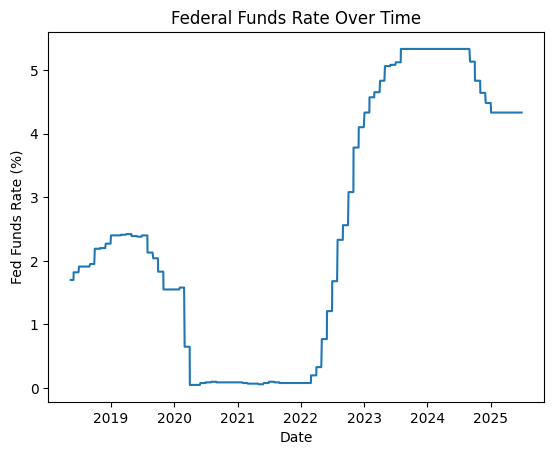

In [429]:
plt.plot(merged_df['Date'], merged_df['Fed Funds Rate'], label='Fed Funds Rate')
plt.title('Federal Funds Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fed Funds Rate (%)')
plt.savefig(VISUALS / "ffr_over_time.png")
plt.show()

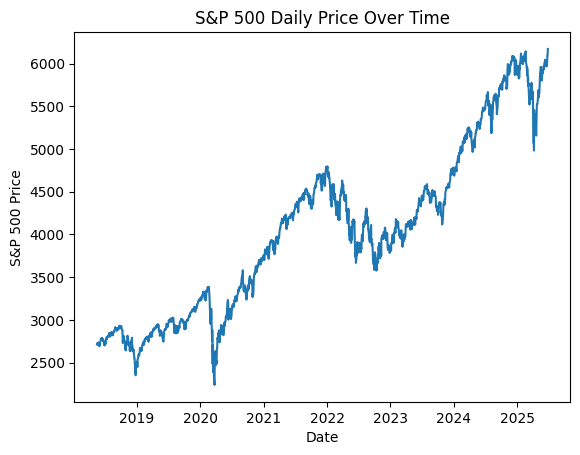

In [430]:
plt.plot(merged_df['Date'], merged_df['Price'], label='S&P 500 Price')
plt.title('S&P 500 Daily Price Over Time')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.savefig(VISUALS / "s&p_over_time.png")
plt.show()

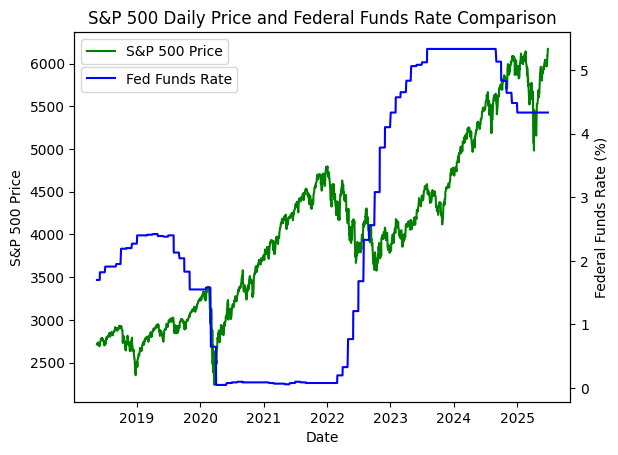

In [431]:
fig, ax1 = plt.subplots()

ax1.plot(merged_df['Date'], merged_df['Price'], color='green', label='S&P 500 Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Price')

ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Fed Funds Rate'], color='blue', label='Fed Funds Rate')
ax2.set_ylabel('Federal Funds Rate (%)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.925))
plt.savefig(VISUALS / "ffr_S&P_comp.png")
plt.title('S&P 500 Daily Price and Federal Funds Rate Comparison')
plt.savefig(VISUALS / "s&p_ffr_comp.png")
plt.show()

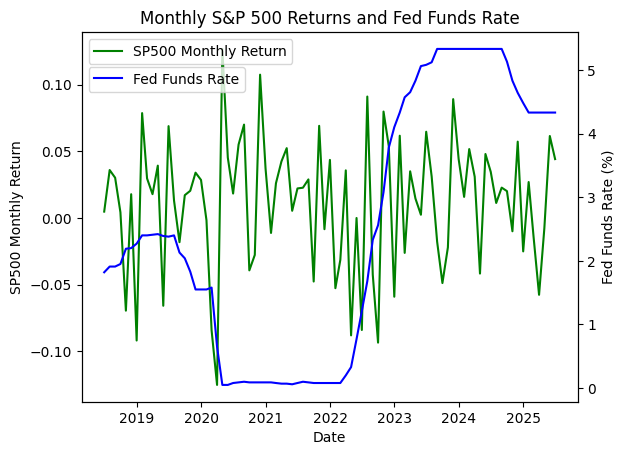

In [432]:
fig, ax1 = plt.subplots()
ax1.plot(merged_month["Date"], merged_month["SP500_Return"], color = 'green', label="SP500 Monthly Return")
ax1.set_xlabel("Date")
ax1.set_ylabel("SP500 Monthly Return")

ax2 = ax1.twinx()
ax2.plot(merged_month["Date"], merged_month["FedFunds"], color = 'blue', label="Fed Funds Rate")
ax2.set_ylabel("Fed Funds Rate (%)")

ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.925))
plt.title("Monthly S&P 500 Returns and Fed Funds Rate")
plt.savefig(VISUALS / "monthly_s&p_ffr_comp.png")
plt.show()

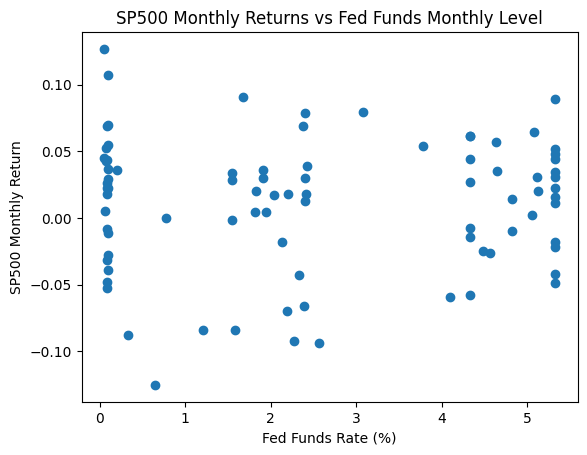

In [433]:
plt.figure()
plt.scatter(merged_month["FedFunds"], merged_month["SP500_Return"])
plt.xlabel("Fed Funds Rate (%)")
plt.ylabel("SP500 Monthly Return")
plt.title("SP500 Monthly Returns vs Fed Funds Monthly Level")
plt.savefig(VISUALS / "monthly_s&p_vs_fed_rate.png")
plt.show()

In [434]:
corr = merged_month["FedFunds"].corr(merged_month["SP500_Return"])
print("Correlation:", corr)

Correlation: 0.030276574381103066


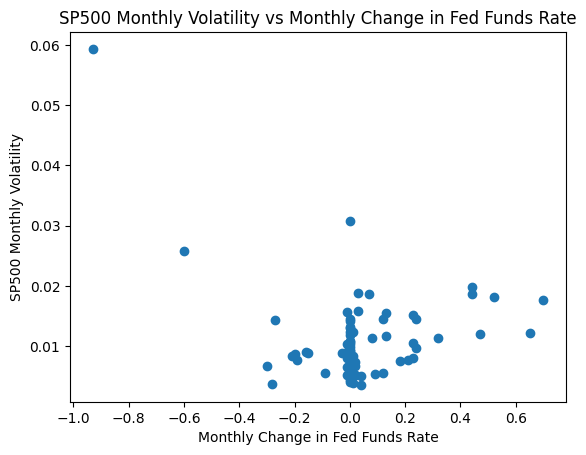

In [435]:
plt.figure()
plt.scatter(merged_month["FedFunds_Change"], merged_month["SP500_Volatility"])
plt.xlabel("Monthly Change in Fed Funds Rate")
plt.ylabel("SP500 Monthly Volatility")
plt.title("SP500 Monthly Volatility vs Monthly Change in Fed Funds Rate")
plt.savefig(VISUALS / "monthly_s&p_vol_vs_ratechange.png")
plt.show()

In [436]:
corr = merged_month["FedFunds_Change"].corr(merged_month["SP500_Volatility"])
print("Correlation:", corr)

Correlation: -0.23629395988480456


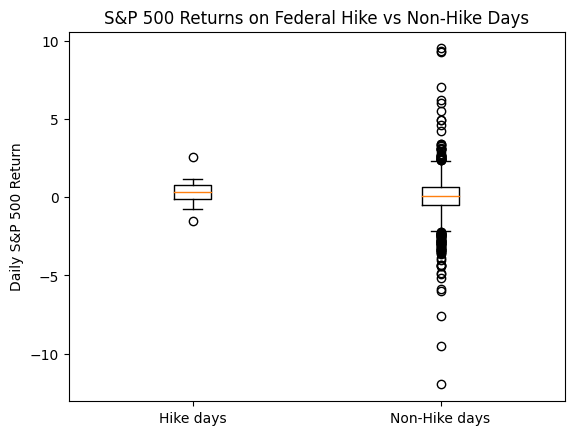

In [437]:
plt.figure()
plt.boxplot([hike_days["Change%_Value"].dropna(), non_hike_days["Change%_Value"].dropna()], labels=["Hike days", "Non-Hike days"], showfliers=True)
plt.ylabel("Daily S&P 500 Return")
plt.title("S&P 500 Returns on Federal Hike vs Non-Hike Days")
plt.savefig(VISUALS / "hike_vs_nonhike_s&p500returns.png")
plt.show()


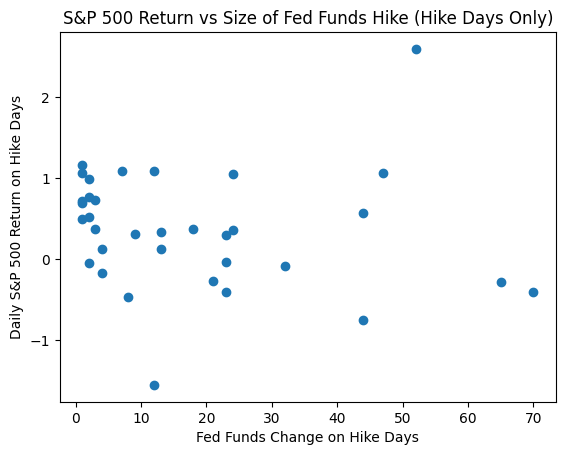

In [438]:
plt.figure()
plt.scatter(hike_days["FedFunds_Change_Value"], hike_days["Change%_Value"])
plt.xlabel("Fed Funds Change on Hike Days")
plt.ylabel("Daily S&P 500 Return on Hike Days")
plt.title("S&P 500 Return vs Size of Fed Funds Hike (Hike Days Only)")
plt.savefig(VISUALS / "s&preturn_vs_hike_size.png")
plt.show()


In [439]:
corr_hike = hike_days["FedFunds_Change_Value"].corr(hike_days["Change%_Value"])
print("Correlation:", corr_hike)

Correlation: -0.09743662419788841


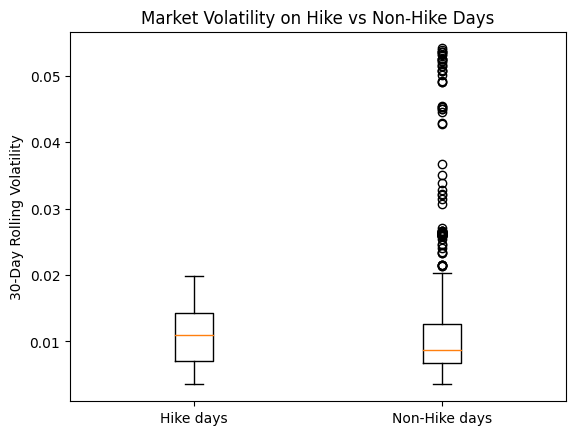

In [440]:
plt.figure()
plt.boxplot([hike_days["Volatility_30D"].dropna(), non_hike_days["Volatility_30D"].dropna()], labels=["Hike days", "Non-Hike days"], showfliers=True)
plt.ylabel("30-Day Rolling Volatility")
plt.title("Market Volatility on Hike vs Non-Hike Days")
plt.savefig(VISUALS / "volatility_hike_vs_nonhike.png")
plt.show()


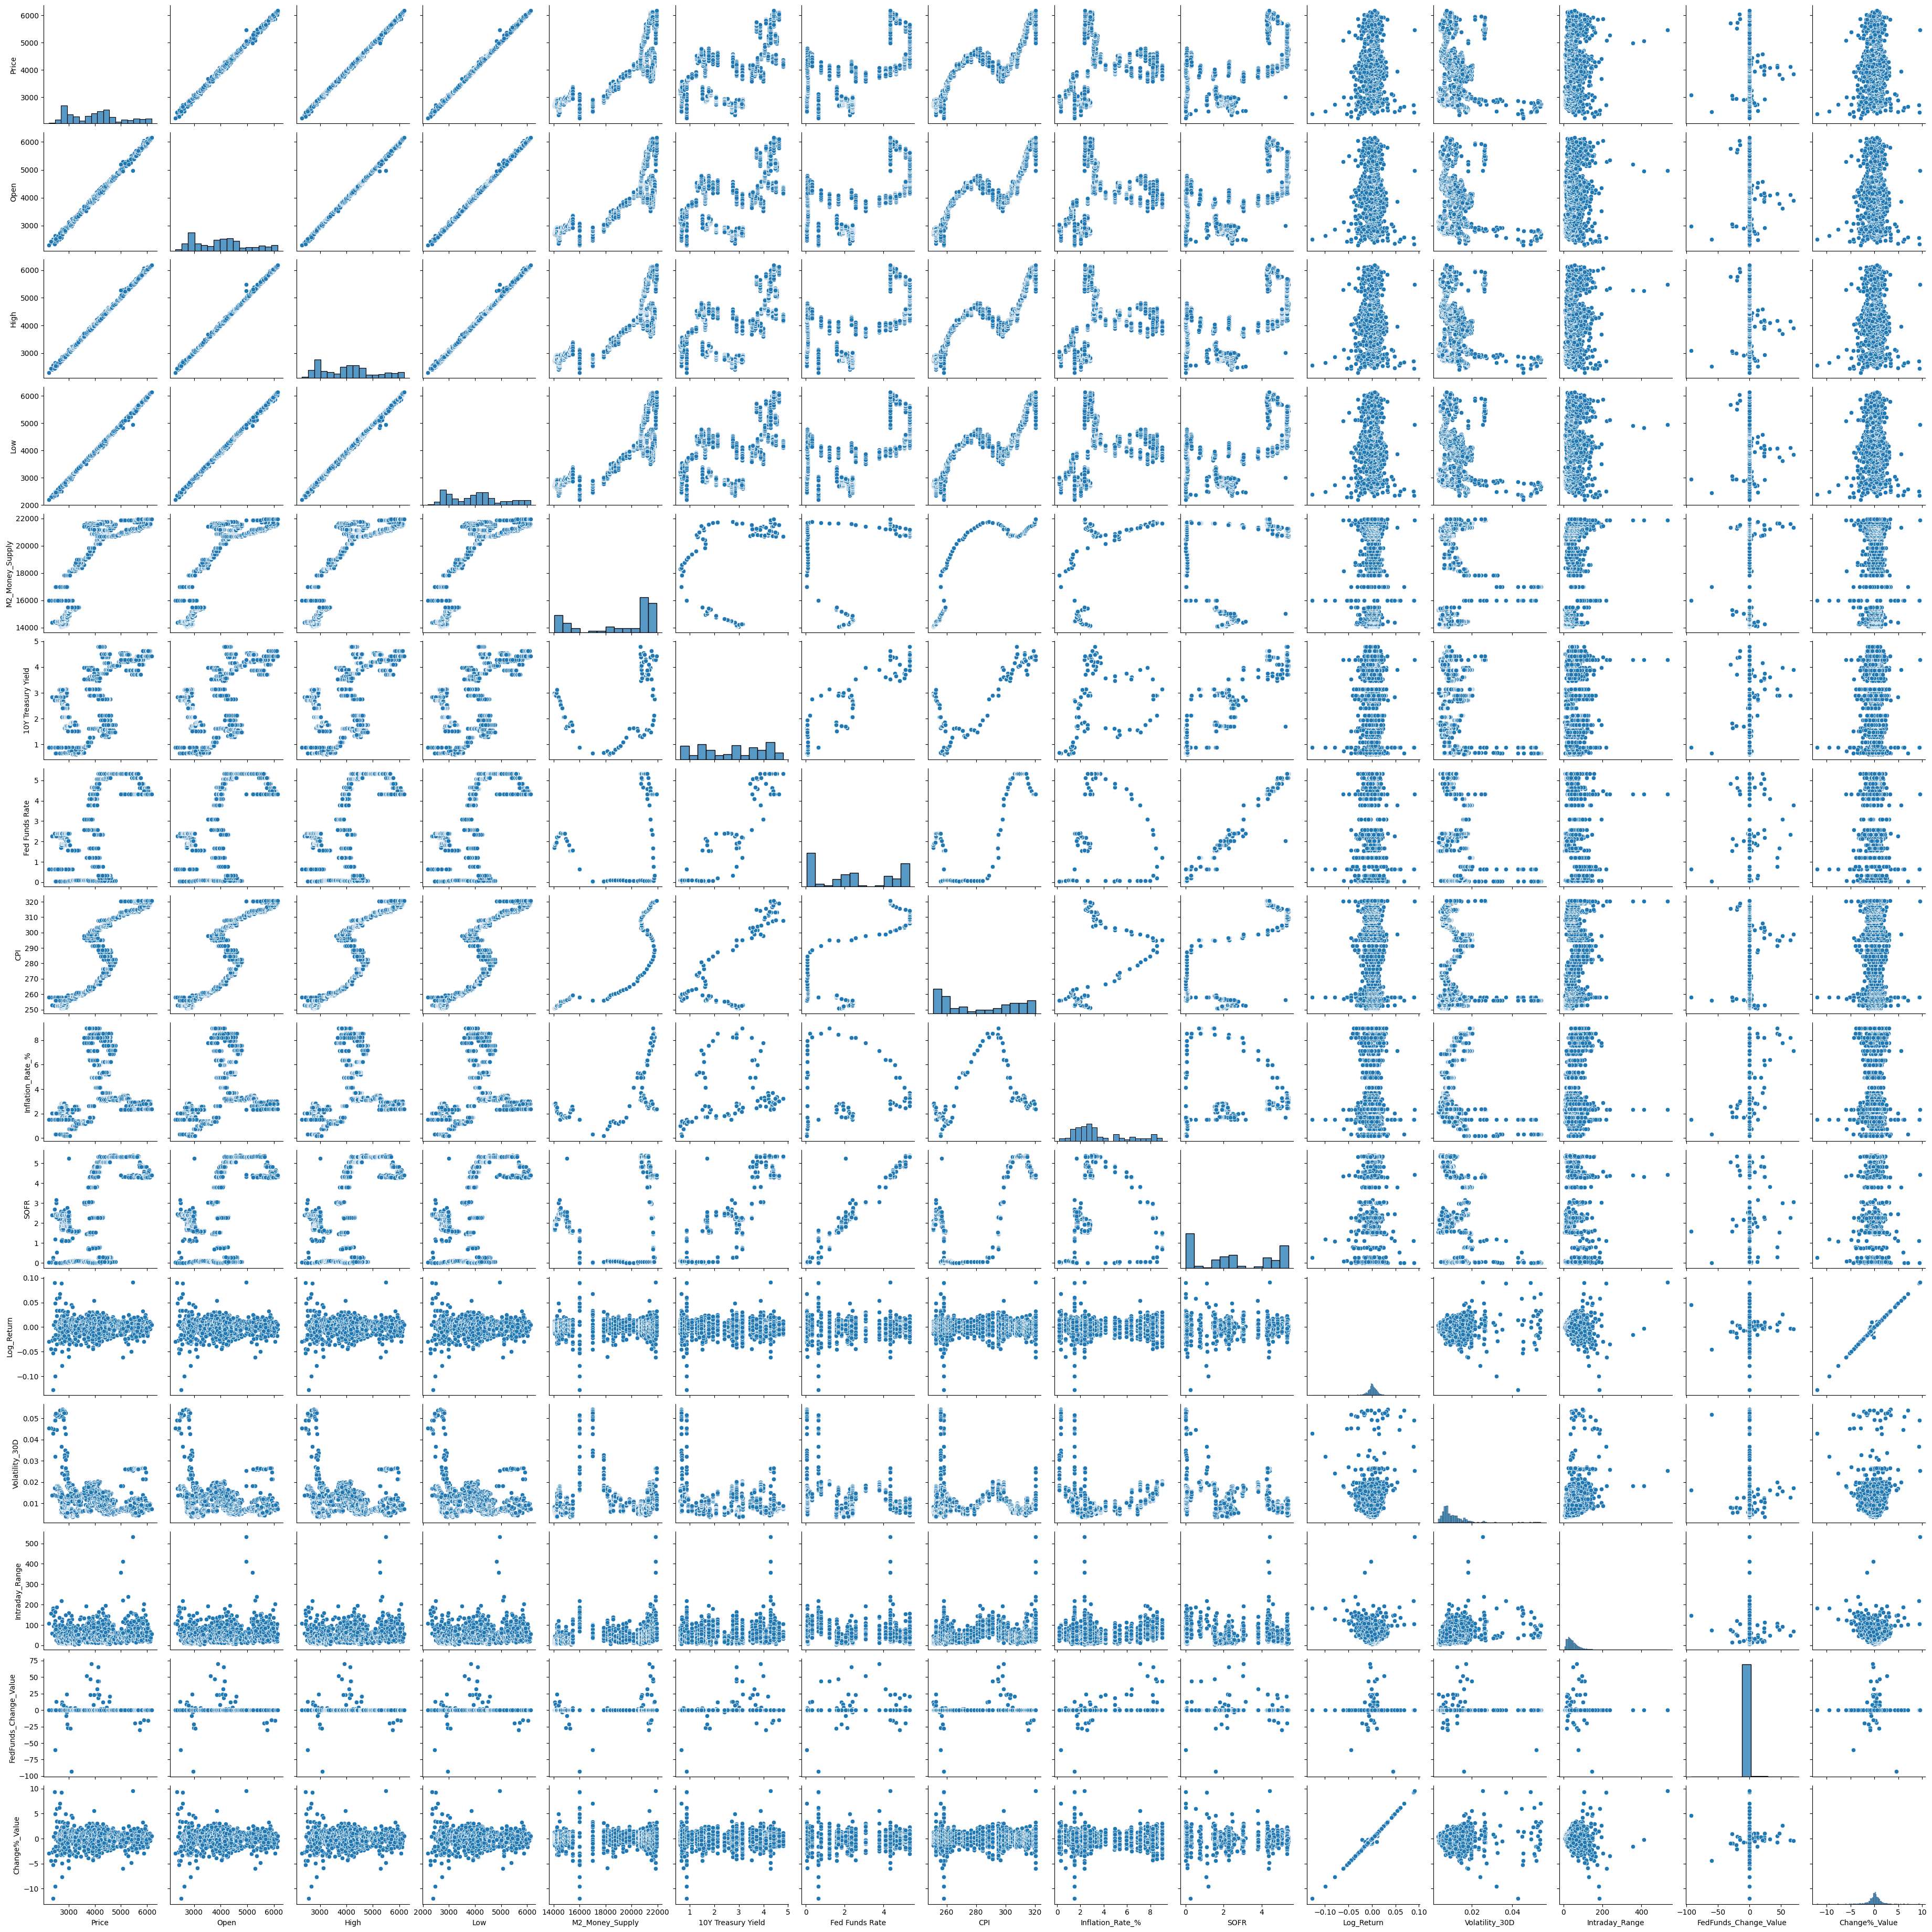

In [441]:
sns.pairplot(merged_df)
plt.savefig(VISUALS / "merged_df_pairplot.png")
plt.show()

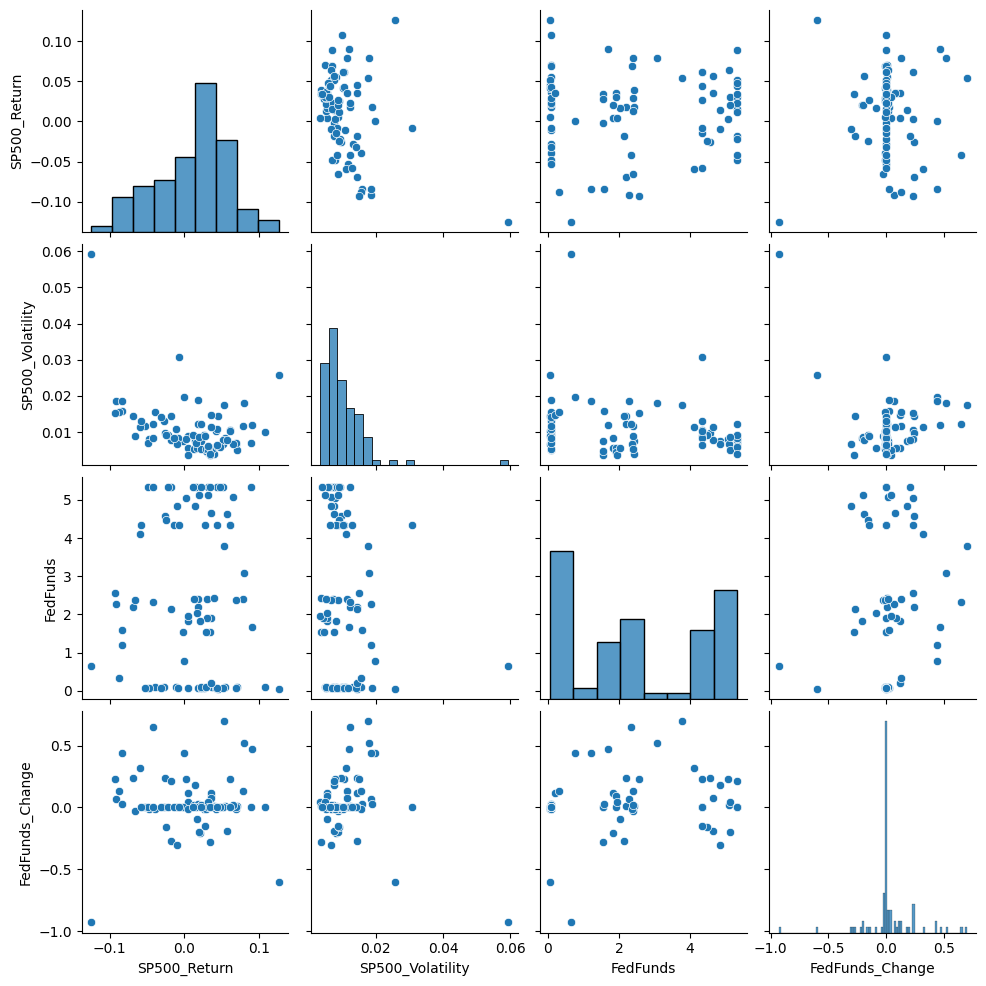

In [442]:
sns.pairplot(merged_month)
plt.savefig(VISUALS / "merged_month_pairplot.png")
plt.show()

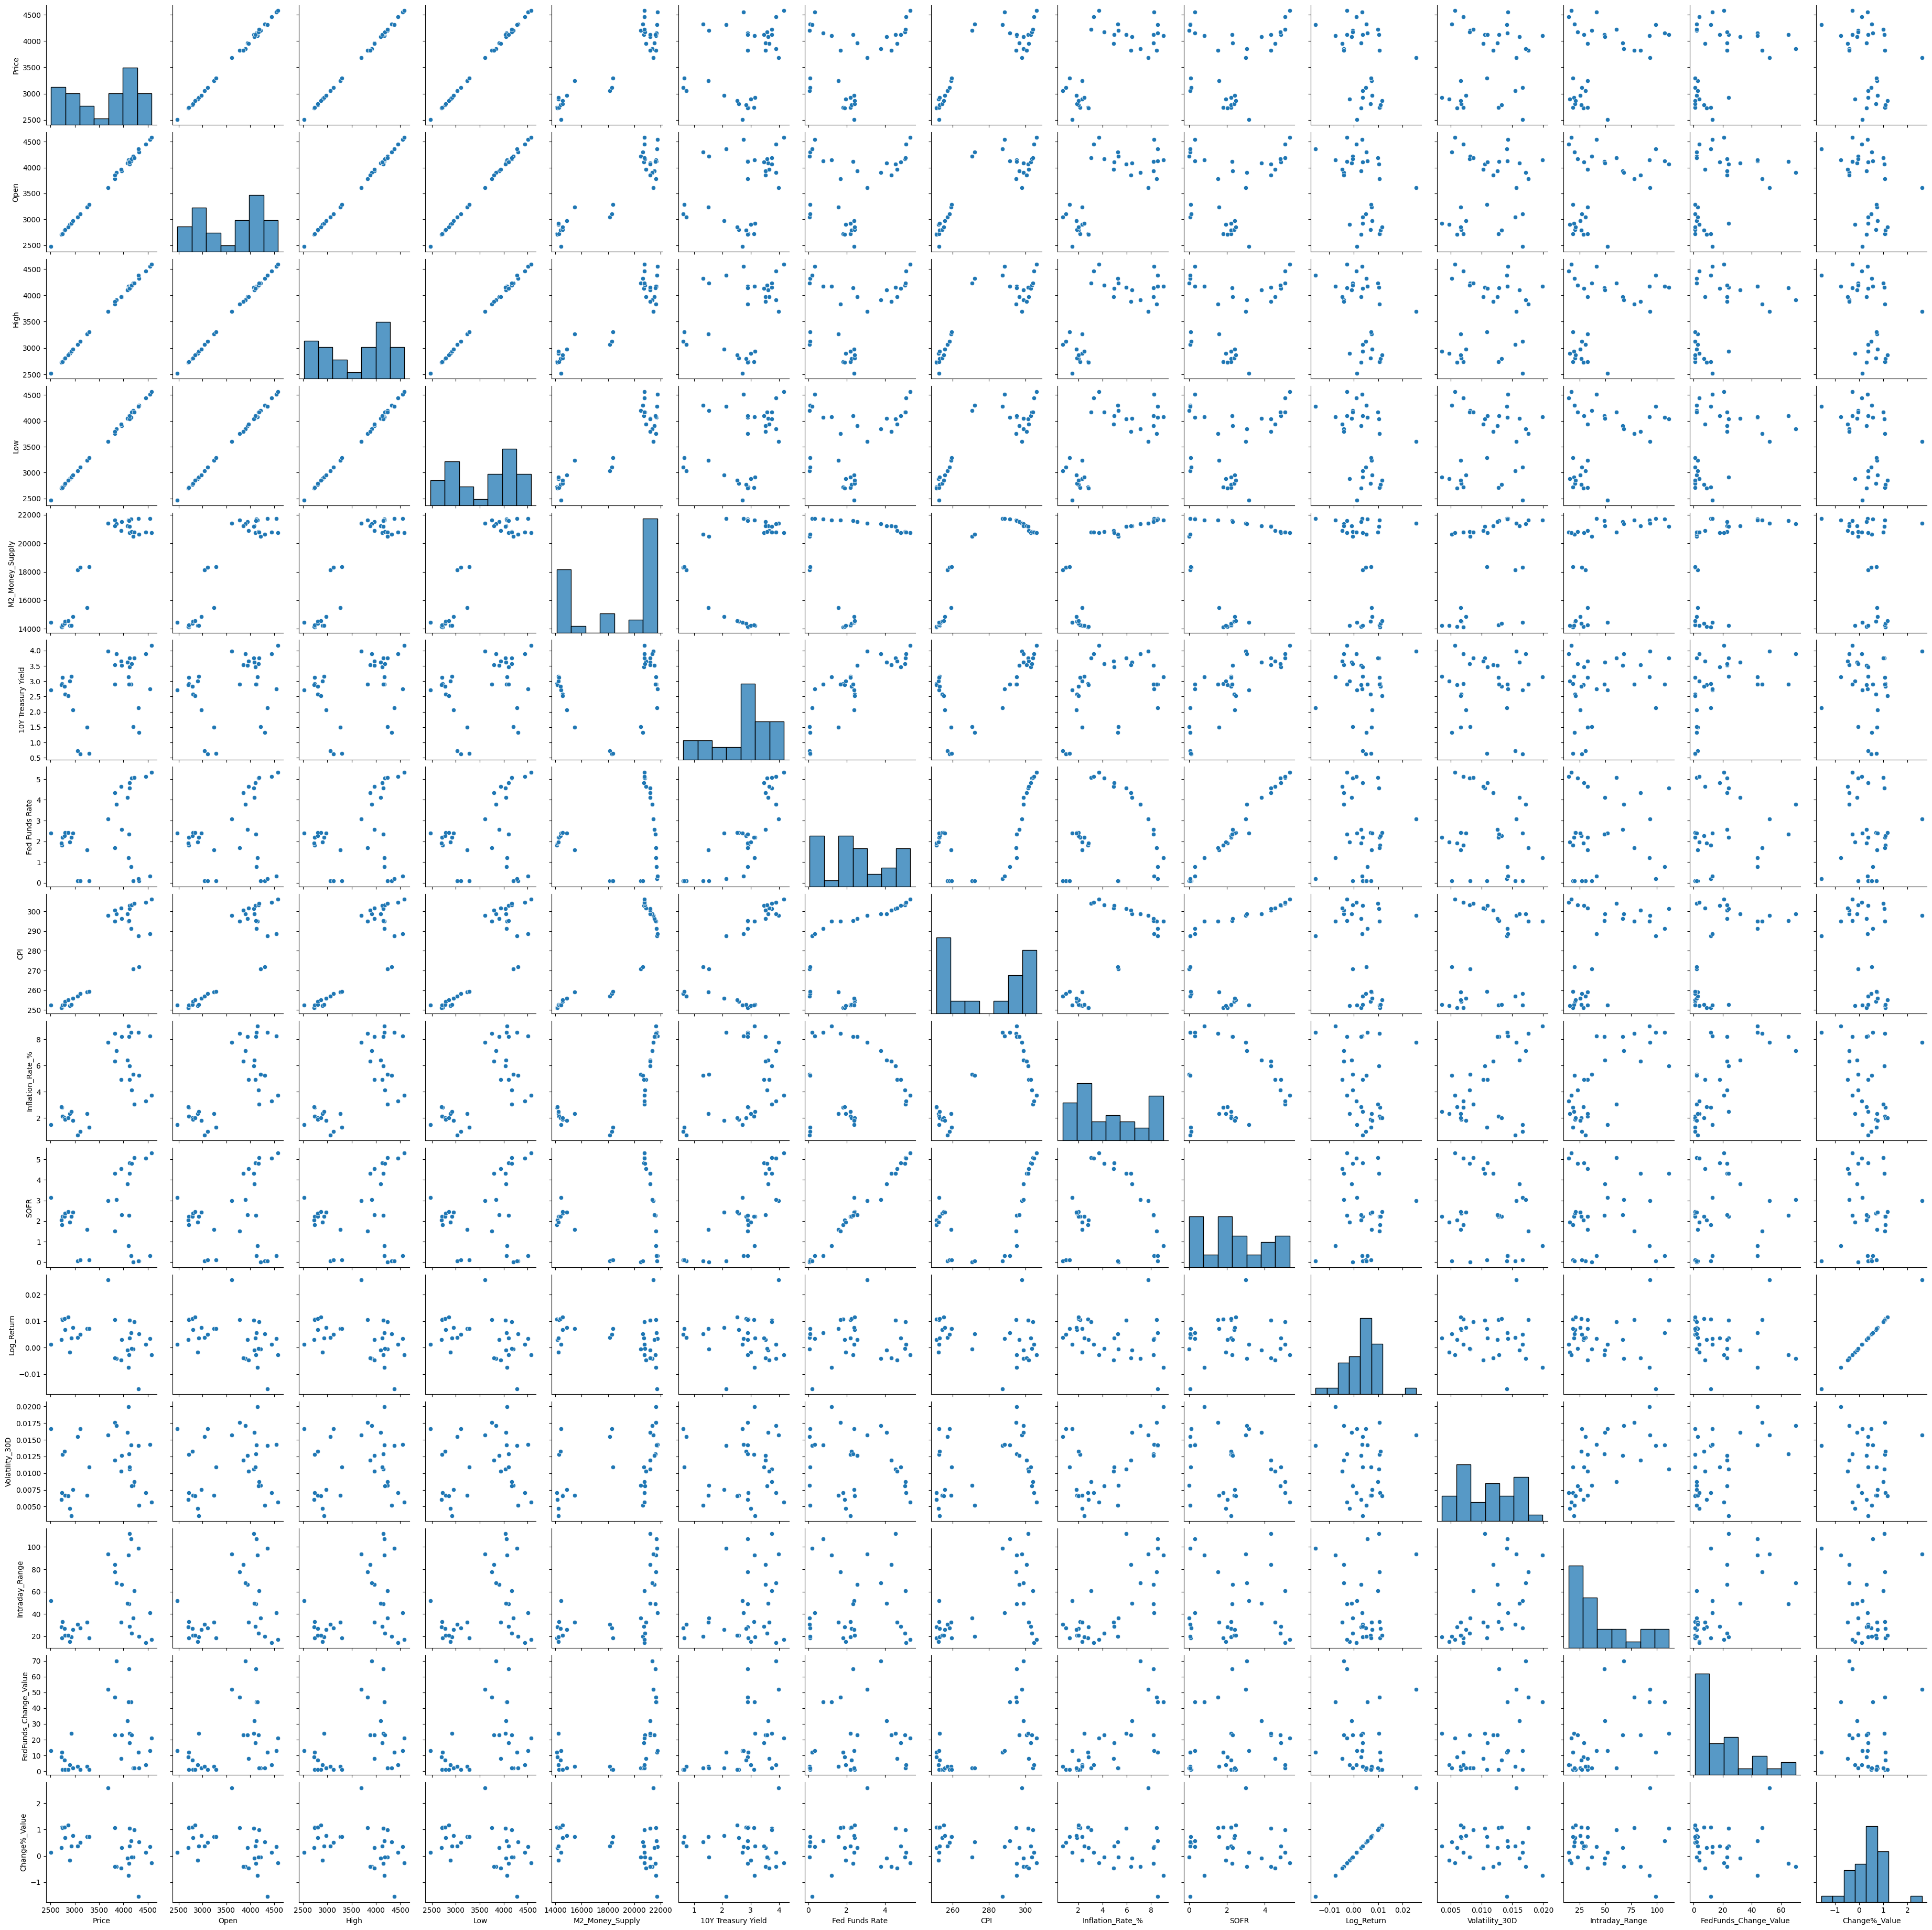

In [443]:
sns.pairplot(hike_days)
plt.savefig(VISUALS / "hikedays_pairplot.png")
plt.show()

In [444]:
data_dict1 = pd.DataFrame({"Variables": merged_df.columns, "Data Type": merged_df.dtypes.astype(str)})
print(data_dict1)

                                   Variables       Data Type
Date                                    Date  datetime64[ns]
Price                                  Price         float64
Open                                    Open         float64
High                                    High         float64
Low                                      Low         float64
Change %                            Change %          object
M2_Money_Supply              M2_Money_Supply         float64
10Y Treasury Yield        10Y Treasury Yield         float64
Fed Funds Rate                Fed Funds Rate         float64
CPI                                      CPI         float64
Inflation_Rate_%            Inflation_Rate_%         float64
SOFR                                    SOFR         float64
Log_Return                        Log_Return         float64
Volatility_30D                Volatility_30D         float64
FedFunds_Change              FedFunds_Change          object
SOFR_Change             

In [445]:
data_dict2 = pd.DataFrame({"Variables": merged_month.columns, "Data Type": merged_month.dtypes.astype(str)})
print(data_dict2)

                         Variables       Data Type
Date                          Date  datetime64[ns]
SP500_Return          SP500_Return         float64
SP500_Volatility  SP500_Volatility         float64
FedFunds                  FedFunds         float64
FedFunds_Change    FedFunds_Change         float64


In [446]:
data_dict = pd.concat([data_dict1, data_dict2])
data_dict.to_csv("data_dictionary.csv", index=False)